Nombre de la entrega : Actividad Semanal -- 5 Repaso Transformación y reducción de dimensiones
Nombre del Alumnno: Abraham Rincón Treviño
Matricula: A00819677
Materia: Ciencia y analitica de datos
Profesor: Maria de la Paz Rico Fernández

# Bienvenido al notebook
#Repaso de Reducción de dimensiones
El objetivo es que entendamos de una manera visual, que es lo que pasa cuando nosotros seleccionamos cierto número de componentes principales o % de variabilidad  de una base de datos.

Primero entenderemos, que pasa adentro de PCA que se basa en lo siguiente a grandes razgos:

**Análisis de Componentes Principales**

El análisis de datos multivariados involucra determinar transformaciones lineales que ayuden
a entender las relaciones entre las características importantes de los datos. La idea central del Análisis de Componentes Principales (PCA) es reducir las dimensiones de un conjunto de datos que presenta variaciones correlacionadas, reteniendo una buena proporción de la variación presente en dicho conjunto. Esto se logra obteniendo la transformación a un nuevo conjunto de variables: los componentes principales (PC). Cada PC es una combinación lineal con máxima varianza en dirección ortogonal a los demás PC.


![title](https://miro.medium.com/max/720/1*XGaA7KWUlhWZLIezYEBIHA.gif)


Para entender un poco más de PCA y SVD, visita el siguiente link:
*Truco: Prueba entrar con tu cuenta del tec :)*

https://towardsdatascience.com/pca-and-svd-explained-with-numpy-5d13b0d2a4d8


Basicamente, vamos a seguir los siguientes pasos:

1. Obtener la covarianza. OJO: X tiene sus datos centrados :)

![title](https://miro.medium.com/max/194/1*92t9OuqxIG0YpJXsNNgI4A.png)

2. Los componentes principales se van a obtener de la eigen descomposicion de la matriz de covarianza.

![title](https://miro.medium.com/max/260/1*c1S0_26A8RxEQQUVyMp5Vw.png)

3. Para la reducción de dimensiones vamos a seleccionar k vectores de W y proyectaremos nuestros datos.

![title](https://miro.medium.com/max/214/1*jnj2YMpWIApnCzxRU_zjfg.png)

![title](https://miro.medium.com/max/720/1*ba0XpZtJrgh7UpzWcIgZ1Q.jpeg)






# Ejercicio 1, Descomposición y composición
***Descomposición***

Encuentra los eigenvalores y eigenvectores de las siguientes matrices

$A = \begin{pmatrix} 3,0,2 \\ 3,0,-2 \\ 0,1,1 \end{pmatrix}$
$A2 = \begin{pmatrix} 1,3,8 \\ 2,0,0 \\ 0,0,1 \end{pmatrix}$
$A3 = \begin{pmatrix} 5,4,0 \\ 1,0,1 \\ 10,7,1 \end{pmatrix}$

y reconstruye la matriz original a traves de las matrices 
$WDW^{-1}$ (OJO. Esto es lo mismo de la ecuación del paso 2 solo le cambiamos la variable a la matriz diagonal)




# Eigenvalores y eigenvectores

In [2]:
###-----------------EJEMPLO DE EIGENVALORES
import numpy as np
from numpy import array
from numpy.linalg import eig
from numpy.linalg import multi_dot
# define la matriz
A = array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])
print("-------Matriz original-------")
print(A)
print("-----------------------------")
# calcula la eigendescomposición
values, vectors = eig(A)
print(values) #D
print(vectors) #W

#Ejemplo de reconstrucción


values, vectors = np.linalg.eig(A)

W = vectors
Winv = np.linalg.inv(W)
D = np.diag(values)
#la matriz B tiene que dar igual a A
#reconstruye la matriz 
print("-------Matriz reconstruida-------")
# Realiza la reconstruccion de B=W*D*Winv, te da lo mismo de A?
#ojo, estas multiplicando matrices, no escalares ;)
#TU CODIGO AQUI-------------------------------------
B1= np.dot(W,D)
B = np.dot(B1,Winv)
#B = multi_dot([W,D*Winv])
print(B)
print("-----------------------------")

-------Matriz original-------
[[1 2 3]
 [4 5 6]
 [7 8 9]]
-----------------------------
[ 1.61168440e+01 -1.11684397e+00 -3.38433605e-16]
[[-0.23197069 -0.78583024  0.40824829]
 [-0.52532209 -0.08675134 -0.81649658]
 [-0.8186735   0.61232756  0.40824829]]
-------Matriz reconstruida-------
[[1. 2. 3.]
 [4. 5. 6.]
 [7. 8. 9.]]
-----------------------------


In [3]:
#Matriz 1

A = array([[3,0,2], [1,3,8], [0,1,1]])

print("---------------Matriz original-----------")
print(A)
print("-----------------------------------------")


#Calculo de la eigendescomposición
values, vectors = eig(A)
print(values) #D
print("----------------------")
print(vectors)#W

# Recontrucción
values, vectors = np.linalg.eig(A)

W = vectors
Winv = np.linalg.inv(W)
D = np.diag(values)

print("----------Matriz reconstruida")

B1 = np.dot(W,D)
B = np.dot(B1, Winv)

print(B)




---------------Matriz original-----------
[[3 0 2]
 [1 3 8]
 [0 1 1]]
-----------------------------------------
[ 5.15114836  2.76243349 -0.91358185]
----------------------
[[-0.21275678  0.97223293 -0.23032575]
 [-0.94993093 -0.20353462 -0.86245008]
 [-0.2288357  -0.11548499  0.45069934]]
----------Matriz reconstruida
[[3.00000000e+00 1.81100901e-16 2.00000000e+00]
 [1.00000000e+00 3.00000000e+00 8.00000000e+00]
 [7.37763730e-18 1.00000000e+00 1.00000000e+00]]


In [4]:
#Matriz 2


A = array([[1,3,8], [2,0,0], [0,0,1]])

print("---------------Matriz original-----------")
print(A)
print("-----------------------------------------")


#Calculo de la eigendescomposición
values, vectors = eig(A)
print(values) #D
print("----------------------")
print(vectors)#W

# Recontrucción
values, vectors = np.linalg.eig(A)

W = vectors
Winv = np.linalg.inv(W)
D = np.diag(values)

print("----------Matriz reconstruida")

B1 = np.dot(W,D)
B = np.dot(B1, Winv)

print(B)







---------------Matriz original-----------
[[1 3 8]
 [2 0 0]
 [0 0 1]]
-----------------------------------------
[ 3. -2.  1.]
----------------------
[[ 0.83205029 -0.70710678 -0.42399915]
 [ 0.5547002   0.70710678 -0.8479983 ]
 [ 0.          0.          0.31799936]]
----------Matriz reconstruida
[[1.00000000e+00 3.00000000e+00 8.00000000e+00]
 [2.00000000e+00 0.00000000e+00 1.59657581e-15]
 [0.00000000e+00 0.00000000e+00 1.00000000e+00]]


In [5]:
#Matriz 3


A = array([[5,4,0], [1,0,1], [10,7,1]])

print("---------------Matriz original-----------")
print(A)
print("-----------------------------------------")


#Calculo de la eigendescomposición
values, vectors = eig(A)
print(values) #D
print("----------------------")
print(vectors)#W

# Recontrucción
values, vectors = np.linalg.eig(A)

W = vectors
Winv = np.linalg.inv(W)
D = np.diag(values)

print("----------Matriz reconstruida")

B1 = np.dot(W,D)
B = np.dot(B1, Winv)

print(B)












---------------Matriz original-----------
[[ 5  4  0]
 [ 1  0  1]
 [10  7  1]]
-----------------------------------------
[ 6.89167094 -0.214175   -0.67749594]
----------------------
[[ 0.3975395   0.55738222  0.57580768]
 [ 0.18800348 -0.72657211 -0.81728644]
 [ 0.89811861 -0.40176864 -0.02209943]]
----------Matriz reconstruida
[[ 5.00000000e+00  4.00000000e+00  2.10769995e-15]
 [ 1.00000000e+00 -2.87453730e-15  1.00000000e+00]
 [ 1.00000000e+01  7.00000000e+00  1.00000000e+00]]


**¿Qué significa  reducir dimensiones?**

Esto será cuando proyectemos a ese espacio de los componentes principales pero no los seleccionemos todos, solo los más importantes y viajemos de regreso a nuestras unidades a través de una proyección.

Es decir:
Unidades-PC
PC-Unidades

Veamoslo gráficamente, ¿qué pasa con esa selección de los PCs y su efecto?.


Para ello usaremos Singular Value Descomposition (SVD).



# Singular Value Descomposition(SVD)

Es otra descomposición que tambien nos ayudara a reducir dimensiones.

<img src="https://miro.medium.com/max/720/1*6wkgGgBy2NLVmRVOw8K86w.png" width="300">



#Ejercicio 2
Juega con Lucy, una cisne, ayudala a encontrar cuantos valores singulares necesita para no perder calidad a través de SVD. Posteriormente usa 3 imágenes de tu preferencia y realiza la misma acción :D

A esto se le llama **compresión de imagenes** :o

[72. 73. 74. ... 48. 47. 47.]


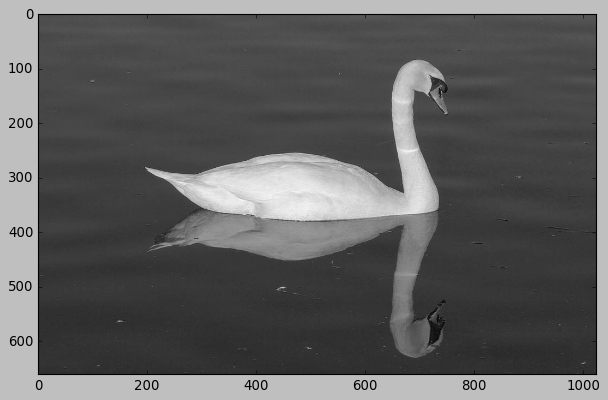

<PIL.Image.Image image mode=LA size=1024x660 at 0x7FE8BEA50220>


In [6]:
from six.moves import urllib
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np

plt.style.use('classic')
img = Image.open(urllib.request.urlopen('https://biblioteca.acropolis.org/wp-content/uploads/2015/03/Cisne.jpg')).convert('LA')
#img = Image.open('lucy.jpg')
imggray = img.convert('LA')
imgmat = np.array(list(imggray.getdata(band=0)),float)

print(imgmat)

imgmat.shape = (imggray.size[1],imggray.size[0])

plt.figure(figsize=(9,6))
plt.imshow(imgmat,cmap='gray')
plt.show()
print(img)

In [7]:
U,D,V = np.linalg.svd(imgmat)
imgmat.shape


(660, 1024)

In [8]:
U.shape

(660, 660)

In [9]:
V.shape

(1024, 1024)

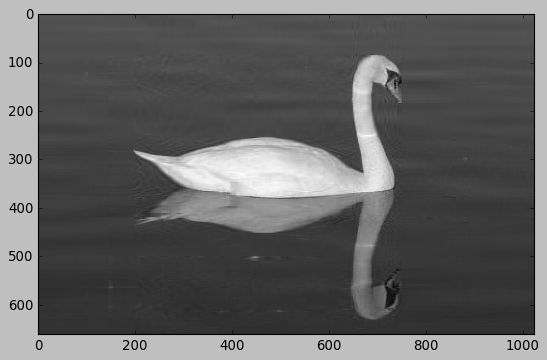

Felicidades la imagen está comprimida


In [10]:
#Cuantos valores crees que son necesarios?
#A=U*D*V

#aqui los elegiremos---------------------------
# por las dimensiones de este caso en particular 
#iremos de 0-660, siendo 660 como normalmente están los datos
#con 50 podemos observar que Lucy se ve casi igual, es decir conservamos aquello que en 
# realidad estaba aportando a la imagen en este caso :D por medio de la variabilidad 
#juega con el valor nvalue y ve que pasa con otros valores
nvalue = 40
#------------------------------
reconstimg = np.matrix(U[:,:nvalue])*np.diag(D[:nvalue])*np.matrix(V[:nvalue,:])
#ve las dimensiones de la imagen y su descomposicion
#660x1024= U(660X660)D(660X1024)V(1024x1024)
        #=U(660Xnvalues)D(nvaluesXnvalue)V(nvaluesx1024)

        #=U(660X50)(50X50)(50X1024)
plt.imshow(reconstimg,cmap='gray')
plt.show()
print("Felicidades la imagen está comprimida")

¡Ahora es tu turno!, comprime 3 imagenes

[ 78.  79.  82. ... 204. 202. 198.]


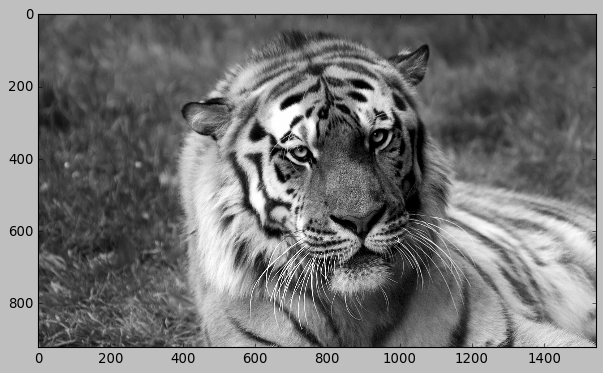

<PIL.Image.Image image mode=LA size=1544x920 at 0x7FE8B8EF49D0>


In [11]:
#imagen 1
from six.moves import urllib
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np

plt.style.use('classic')
img = Image.open(urllib.request.urlopen('https://upload.wikimedia.org/wikipedia/commons/e/e8/Tigre.jpg')).convert('LA')
#img = Image.open('lucy.jpg')
imggray = img.convert('LA')
imgmat = np.array(list(imggray.getdata(band=0)),float)

print(imgmat)

imgmat.shape = (imggray.size[1],imggray.size[0])

plt.figure(figsize=(9,6))
plt.imshow(imgmat,cmap='gray')
plt.show()
print(img)

In [12]:
U,D,V = np.linalg.svd(imgmat)
imgmat.shape



(920, 1544)

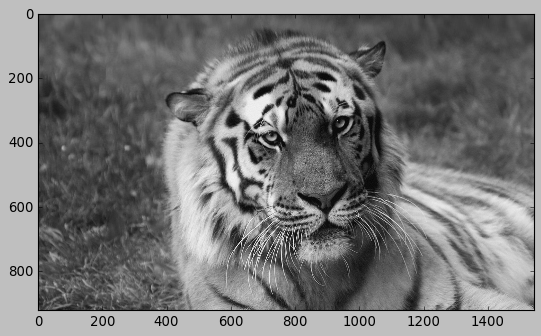

Felicidades la imagen está comprimida


In [13]:
nvalue = 300
#------------------------------
reconstimg = np.matrix(U[:,:nvalue])*np.diag(D[:nvalue])*np.matrix(V[:nvalue,:])
#ve las dimensiones de la imagen y su descomposicion
#660x1024= U(660X660)D(660X1024)V(1024x1024)
        #=U(660Xnvalues)D(nvaluesXnvalue)V(nvaluesx1024)

        #=U(660X50)(50X50)(50X1024)
plt.imshow(reconstimg,cmap='gray')
plt.show()
print("Felicidades la imagen está comprimida")

[213. 214. 214. ... 117. 117. 118.]


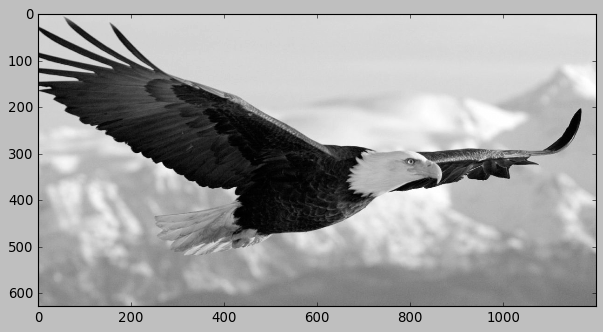

<PIL.Image.Image image mode=LA size=1200x627 at 0x7FE8C0DD9E20>


In [14]:
#imagen 2
from six.moves import urllib
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np

plt.style.use('classic')
img = Image.open(urllib.request.urlopen('https://www.infoaguilas.com/Imagenes/fotos-de-aguilas.jpg')).convert('LA')
#img = Image.open('lucy.jpg')
imggray = img.convert('LA')
imgmat = np.array(list(imggray.getdata(band=0)),float)

print(imgmat)

imgmat.shape = (imggray.size[1],imggray.size[0])

plt.figure(figsize=(9,6))
plt.imshow(imgmat,cmap='gray')
plt.show()
print(img)


In [15]:
U,D,V = np.linalg.svd(imgmat)
imgmat.shape

(627, 1200)

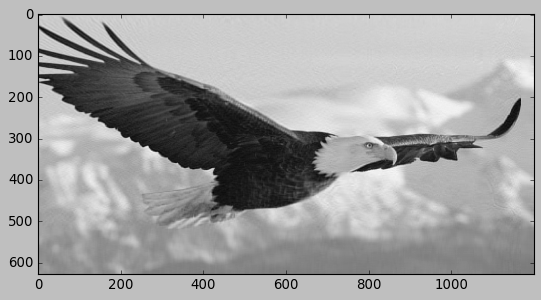

Felicidades la imagen está comprimida


In [16]:
nvalue = 100
#------------------------------
reconstimg = np.matrix(U[:,:nvalue])*np.diag(D[:nvalue])*np.matrix(V[:nvalue,:])
#ve las dimensiones de la imagen y su descomposicion
#660x1024= U(660X660)D(660X1024)V(1024x1024)
        #=U(660Xnvalues)D(nvaluesXnvalue)V(nvaluesx1024)

        #=U(660X50)(50X50)(50X1024)
plt.imshow(reconstimg,cmap='gray')
plt.show()
print("Felicidades la imagen está comprimida")

[53. 53. 54. ... 40. 37. 35.]


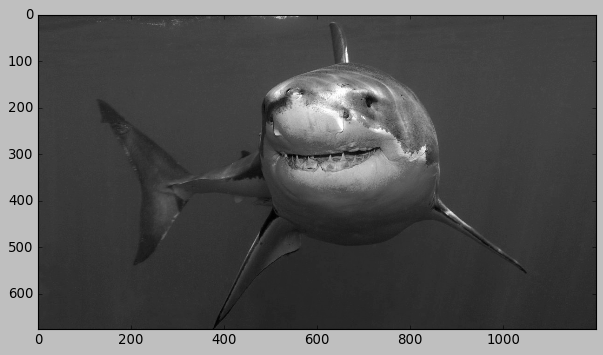

<PIL.Image.Image image mode=LA size=1200x675 at 0x7FE8BFBB6CD0>


In [17]:
#imagen 3
from six.moves import urllib
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np

plt.style.use('classic')
img = Image.open(urllib.request.urlopen('https://www.tiburoneswiki.com/Imagenes/foto-del-gran-tiburon-blanco.jpg')).convert('LA')
#img = Image.open('lucy.jpg')
imggray = img.convert('LA')
imgmat = np.array(list(imggray.getdata(band=0)),float)

print(imgmat)

imgmat.shape = (imggray.size[1],imggray.size[0])

plt.figure(figsize=(9,6))
plt.imshow(imgmat,cmap='gray')
plt.show()
print(img)



In [18]:
U,D,V = np.linalg.svd(imgmat)
imgmat.shape

(675, 1200)

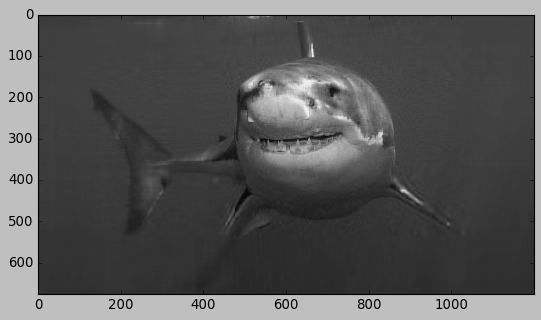

Felicidades la imagen está comprimida


In [19]:
nvalue = 50
#------------------------------
reconstimg = np.matrix(U[:,:nvalue])*np.diag(D[:nvalue])*np.matrix(V[:nvalue,:])
#ve las dimensiones de la imagen y su descomposicion
#660x1024= U(660X660)D(660X1024)V(1024x1024)
        #=U(660Xnvalues)D(nvaluesXnvalue)V(nvaluesx1024)

        #=U(660X50)(50X50)(50X1024)
plt.imshow(reconstimg,cmap='gray')
plt.show()
print("Felicidades la imagen está comprimida")

# Ejercicio 3

**Feature importances**

Para este ejercicio, te pediremos que sigas el tutorial de la siguiente pagina:

https://towardsdatascience.com/pca-clearly-explained-how-when-why-to-use-it-and-feature-importance-a-guide-in-python-7c274582c37e




4. The maximum number of meaningful components
There is an upper bound of the meaningful components that can be extracted using PCA. This is related to the rank of the covariance/correlation matrix (Cx). Having a data matrix X with shape [n_samples, n_features/n_variables], the covariance/correlation matrix would be [n_features, n_features] with maximum rank equal to min(n_samples, n_features).
Thus, we can have at most min(n_samples, n_features)meaningful PC components/dimensions due to the maximum rank of the covariance/correlation matrix.

In [20]:
#tu codigo aqui
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.decomposition import PCA
import pandas as pd
from sklearn.preprocessing import StandardScaler

#Load the data
iris = datasets.load_iris()
X = iris.data
y = iris.target

# Z-score the features
scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)

# The PCA model
pca = PCA(n_components=2) # estimate only 2 PCs
X_new = pca.fit_transform(X) # project the original data into the PCA space




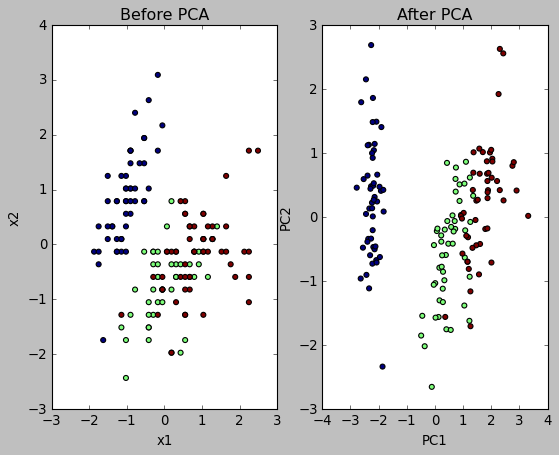

In [21]:
# Let’s plot the data before and after the PCA transform and also color
#code each point (sample) using the corresponding class of the flower (y) .


fig, axes = plt.subplots(1,2)
axes[0].scatter(X[:,0], X[:,1], c=y)
axes[0].set_xlabel('x1')
axes[0].set_ylabel('x2')
axes[0].set_title('Before PCA')
axes[1].scatter(X_new[:,0], X_new[:,1], c=y)
axes[1].set_xlabel('PC1')
axes[1].set_ylabel('PC2')
axes[1].set_title('After PCA')
plt.show()



We can see that in the PCA space, the variance is maximized along PC1 (explains 73% of the variance) and PC2 (explains 22% of the variance). Together, they explain 95%.

In [22]:
print(pca.explained_variance_ratio_)


[0.72962445 0.22850762]


In [23]:
# Covariance matrix
np.cov(X_new.T)

array([[2.93808505e+00, 2.10646975e-16],
       [2.10646975e-16, 9.20164904e-01]])

In [24]:
pca.explained_variance_

array([2.93808505, 0.9201649 ])

7. Feature importance
The importance of each feature is reflected by the magnitude of the corresponding values in the eigenvectors (higher magnitude — higher importance).
Let’s find the most important features:

In [25]:
print(abs(pca.components_))

[[0.52106591 0.26934744 0.5804131  0.56485654]
 [0.37741762 0.92329566 0.02449161 0.06694199]]


Here, pca.components_ has shape [n_components, n_features] Thus, by looking at the PC1 (first Principal Component) which is the first row



Describe lo relevante del ejercicio y que descubriste de las variables análizadas. 

we can conclude that feature 1, 3 and 4 are the most important for PC1. Similarly, we can state that feature 2 and then 1 are the most important for PC2.

To sum up, we look at the absolute values of the eigenvectors’ components corresponding to the k largest eigenvalues. In sklearn the components are sorted by explained variance. The larger they are these absolute values, the more a specific feature contributes to that principal component.
8. The biplot

The biplot is the best way to visualize all-in-one following a PCA analysis.
There is an implementation in R but there is no standard implementation in python so I decided to write my own function for that:

In [26]:
def biplot(score, coeff , y):
    '''
    Author: Serafeim Loukas, serafeim.loukas@epfl.ch
    Inputs:
       score: the projected data
       coeff: the eigenvectors (PCs)
       y: the class labels
   '''
    xs = score[:,0] # projection on PC1
    ys = score[:,1] # projection on PC2
    n = coeff.shape[0] # number of variables
    plt.figure(figsize=(10,8), dpi=100)
    classes = np.unique(y)
    colors = ['g','r','y']
    markers=['o','^','x']
    for s,l in enumerate(classes):
        plt.scatter(xs[y==l],ys[y==l], c = colors[s], marker=markers[s]) # color based on group
    for i in range(n):
        #plot as arrows the variable scores (each variable has a score for PC1 and one for PC2)
        plt.arrow(0, 0, coeff[i,0], coeff[i,1], color = 'k', alpha = 0.9,linestyle = '-',linewidth = 1.5, overhang=0.2)
        plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, "Var"+str(i+1), color = 'k', ha = 'center', va = 'center',fontsize=10)

    plt.xlabel("PC{}".format(1), size=14)
    plt.ylabel("PC{}".format(2), size=14)
    limx= int(xs.max()) + 1
    limy= int(ys.max()) + 1
    plt.xlim([-limx,limx])
    plt.ylim([-limy,limy])
    plt.grid()
    plt.tick_params(axis='both', which='both', labelsize=14)

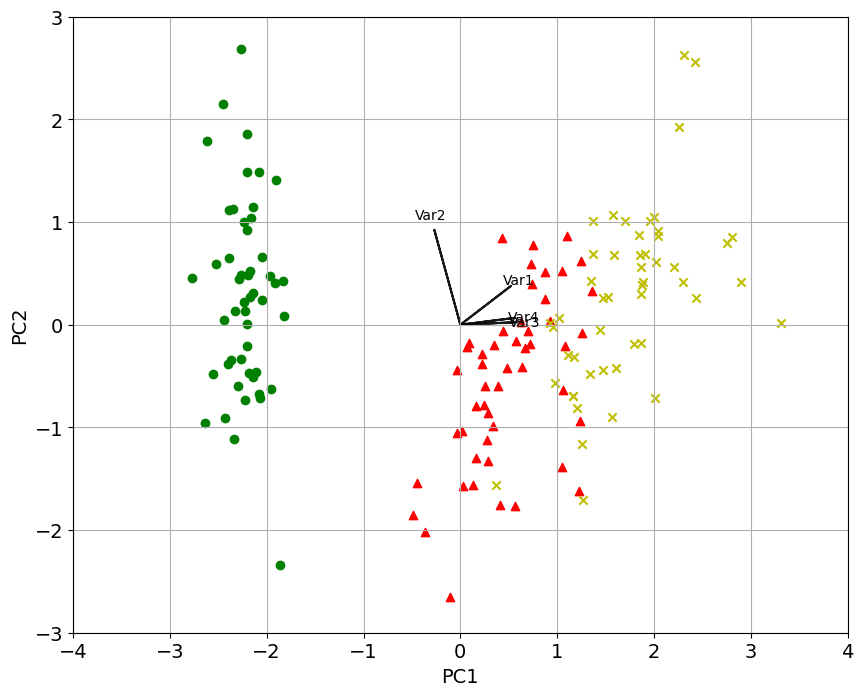

In [27]:
import matplotlib as mpl
mpl.rcParams.update(mpl.rcParamsDefault) # reset ggplot style
# Call the biplot function for only the first 2 PCs
biplot(X_new[:,0:2], np.transpose(pca.components_[0:2, :]), y)
plt.show()

Realiza un comentario relacionado a los pasos que se llevaron a cabo en este proceso de features importances.

¿Qué es feature importance y para que nos sirve?

Es el analisis para detectar cuales variables tienen la mayor varianza en el set, las cuales tienen la menor covariabilidad entre ellas, practicamente son las variables que más información aportan al analisis.
Al realizar la suma del cuadrado de los errores para los diferentes datos en una grafica 2D el cual nos realiza una linea que recorre todos los datos pasando por el origen, esta linea saca las distancias desde la linea hasta los datos, la posición en la cual esta distancia sea menor sera el “Principal Component”, despues realizaremos una vectorización de esta linea donde sacaremos su maginitud y dirección (eigenvalores, y eigenvectores). Con esto puedes saber las magnitudes en X y en Y para realizar el Eigenvector o PC1.

¿Qué hallazgos fueron los más relevantes durante el análisis del ejercicio?

Me pareció muy interesante la forma de ver la importancia de las variables y el como pueden aportar la misma información al estar correlacionadas entre ellos, al buscar eliminar la correlación entre las variables estamos achicando las features a solo las variables que nos den información diferente, que nos den una mayor perespectiva del fenomeno, asi eliminamos la duplicidad y optimizamos el analisis enfocandonos en una menor cantidad de features.






¿Dónde lo aplicarías o te sería de utilidad este conocimiento

Cuando me enfrente a casos con millones de datos, donde tenga muchisimas variables de entrada ahi es donde puedo aplicar este tipo de reducciónes para no solo reducir mi atención a un numero más sencillo de analizar, sino que pueda eficientizar los tiempos de modelado y analisis de estas variables.


